<a href="https://colab.research.google.com/github/GuFelicio/FraudeCartao/blob/main/Transa%C3%A7%C3%B5es_Fraudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse projeto tem o intuito de utilizar modelos preditivos para ajudar na detecção de transações fraudulentas!

Durante esse projeto, os objetivos traçados são:



*   Entender a distribuição dos pequenos dados que foram fornecidos
*   Criar uma estrutura de dados com uma proporção de 50/50 de transações fraudulentas e não fraudulenta
*   Determinar alguns Classificadores e decidir qual o melhor a ser utilizado
*   Entender alguns erros cometidos em conjuntos de dados desequilibrados como o que estamos utilizando.


Durante o projeto foi utilizado:

**- Pré Processamento de Dados:** Tratamento de valores ausentes, normalização
e transformação das variáveis

**- Análise Exploratória de Dados (EDA):** Exploração dos dados para entender as características, distribuição das classes e identificação de padrões

**- Modelagem: **Treinamento de alguns modelos de classificação, para entender qual atende melhor a solução do problema!

**- Implementação Final:** Validação do modelo final nos dados de teste.






---
*Iremos assumir que, colunas faltantes com os nomes das características que não são mostradas por razões de privacidade, já estão escalonadas*


---





---



In [ ]:
#Aqui são todas as bibliotecas que utilizaremos durante esse projeto!

import pandas as pd  #Biblioteca PANDAS para fazer a leitura do documento CSV

import numpy as np #Biblioteca de Algebra Linear

import tensorflow as tf #Biblioteca para utilização de Machine Learning

import matplotlib.pyplot as plt #Biblioteca para criação e visualização de gráficos

import seaborn as sns #Biblioteca que tem o MatPlot como base, para "embelezar gráficos"

from sklearn.manifold import TSNE #TSNE é uma técnica de redução de dimensionalidade

from sklearn.decomposition import PCA, TruncatedSVD #Biblioteca para aplicar PCA

import matplotlib.patches as mpatches #Biblioteca para criar formas e patches em gráficos

import time #Biblioteca para medir o tempo de execução


#Bibliotecas de Classificação


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




# **Primeiro passo**

A primeira ação que precisamos fazer, é entender um pouco mais dos dados que estamos mexendo!

Olhando nosso DataSet, vemos que, tirando a transação e o valor, não sabemos quais são as colunas, mas sabemos que elas já foram escalonadas! (Informações dadas pelos criadores do Dataset)

Alguns pontos observados:


*   Os valores de transação são pequenos. A média deles é de $88 (88 Dólares)

*   Não existem valores nulos, então não precisamos entrar com tratamento de para substituir valores.
*   A maior parte das transações não são Fraudulentas.


Para descobrir isso usamos o seguinte código:



In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab/Projeto Fraudes/creditcard.csv')

dados.head() #Apresentação do sucesso da importação dos dados com a função "HEAD" que apresenta as 5 primeiras linhas do arquivo.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dados.describe() #Função utilizada para gerar algumas estatísticas descritivas dos dados

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
dados.isnull().sum().max()
#Verificação da existência de valores nulos dentro dos dados. Utilização do SUM e MAX, são para ajudar na contagem de valores nulos nas tabelas

0

In [ ]:
dados.columns #Comando para podermos pegar o nome das tabelas onde temos: Time, VX, Amount e Class.

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
print('', round(dados['Class'].value_counts()[0]/len(dados)*100,2), '% da base de Dados NÂO são transações Fraudulentas.')
print('', round(dados['Class'].value_counts()[1]/len(dados)*100,2), '% da base de Dados SÂO transações Fraudulentas.')

#Um calculo básico de porcentagem para entendermos a % de transações são fraudulentas e a % de transações não fraudulentas.

 99.83 % da base de Dados NÂO são transações Fraudulentas.
 0.17 % da base de Dados SÂO transações Fraudulentas.


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

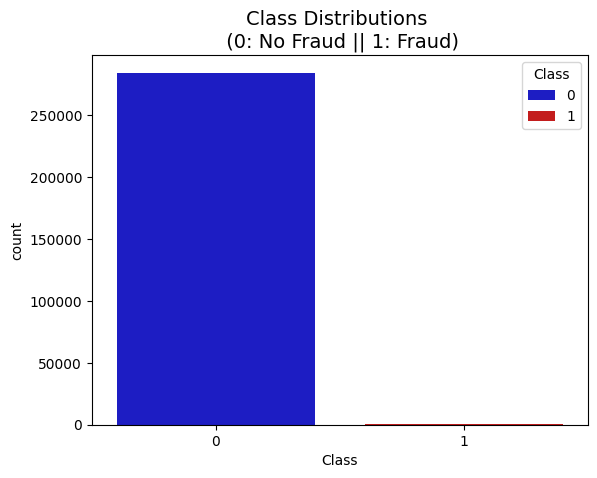

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=dados, hue="Class", palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Como visto na porcentagem e também na criação do gráfico, existe uma disparidade muito grande na quantidade de transações que são e não são fraudulentas.

Como não queremos que nossos modelos de classificação assumam que a maioria não são fraudes e sim que eles possam ter a certeza que a transação é ou não fraudulenta, iremos criar uma nova amostra de dados, onde haverá uma divisão 50/50 de transações! Além disso, iremos escalonar as colunas Tempo e Valor para que possamos ter uma importância igual na modelagem, podendo nos levar a resultados melhores!



---



# **Segundo Passo:**


No segundo passo iremos escalonar as colunas de tempo e valor, altera-las no Dataset e depois criaremos nosso novo Dataset 50/50.

In [ ]:
dados.head() #Vamos ver como está antes de escalonarmos as colunas Time e Amount

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std = StandardScaler()
rob = RobustScaler()

dados['scaled_amount'] = rob.fit_transform(dados['Amount'].values.reshape(-1,1))
dados['scaled_time'] = rob.fit_transform(dados['Time'].values.reshape(-1,1))

dados.drop(['Time','Amount'], axis=1, inplace=True)

dados.head() #Novamente o .HEAD para mostrarmos como ficou a tabela após
             #a utilização do RobustScaler

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [ ]:
#Por uma questão de organização, iremos reposicionar as tabelas escaladondas
#no nosso Dataset.

scaled_amount = dados['scaled_amount']
scaled_time = dados['scaled_time']

dados.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
dados.insert(0, 'scaled_amount', scaled_amount)
dados.insert(1, 'scaled_time', scaled_time)

dados.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Vamos agora para o próximo passo, onde iremos ajustar nosso modelo fazendo divisão, distribuição e conversão dos dados, para então 'randomizarmos' os dados para nossa amostra 50/50.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

print('', round(dados['Class'].value_counts()[0]/len(dados)*100,2), '% da base de Dados NÂO são transações Fraudulentas.')
print('', round(dados['Class'].value_counts()[1]/len(dados)*100,2), '% da base de Dados SÂO transações Fraudulentas.')

#Separando as características (X) e os rótulos (y)
x = dados.drop('Class', axis=1)
y = dados['Class']

#Agora utilizaremos o StratifiedKFold para dividir os dados em conjuntos de treinamento e testes

separacao = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

#Nesse ponto, iremos fazer a iteração sobre os índices de treinamento e teste gerados pelo Stratified

for treino_index, teste_index in separacao.split(x,y):
    print("Treino: ", treino_index, "/ Teste: ", teste_index)
    original_xtreino, original_xteste = x.iloc[treino_index], x.iloc[teste_index]
    original_ytreino, original_yteste = y.iloc[treino_index], y.iloc[teste_index]

#Vamos verificar se a distribuição das classes nos conjuntos está certa

treino_unique_label, treino_contador_label = np.unique(original_ytreino, return_counts=True)
teste_unique_label, teste_contador_label = np.unique(original_yteste, return_counts=True)
print('-' * 100)

print('Distribuição de rótulos: \n')
print(treino_contador_label/ len(original_ytreino))
print(teste_contador_label/ len(original_yteste))

#Por último, vamos converter os conjuntos para arrays numpy

original_xtreino = original_xtreino.values
original_xteste = original_xteste.values
original_ytreino = original_ytreino.values
original_yteste = original_yteste.values


 99.83 % da base de Dados NÂO são transações Fraudulentas.
 0.17 % da base de Dados SÂO transações Fraudulentas.
Treino:  [ 30473  30496  31002 ... 284804 284805 284806] / Teste:  [    0     1     2 ... 57017 57018 57019]
Treino:  [     0      1      2 ... 284804 284805 284806] / Teste:  [ 30473  30496  31002 ... 113964 113965 113966]
Treino:  [     0      1      2 ... 284804 284805 284806] / Teste:  [ 81609  82400  83053 ... 170946 170947 170948]
Treino:  [     0      1      2 ... 284804 284805 284806] / Teste:  [150654 150660 150661 ... 227866 227867 227868]
Treino:  [     0      1      2 ... 227866 227867 227868] / Teste:  [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Distribuição de rótulos: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


Agora que finalizamos os ajustes em nosso modelo, vamos começar a utilização do Random UnderSampling!

Escolhi usar o Random UnderSampling ao invés do OverSampling, pelo fato de utilizarmos apenas transações 'reais' e que já estão no Dataset ao invés de criar novas transações que não existem!

Um ponto negativo nisso tudo é: Corremos um risco de uma performance não tão precisa quanto gostaríamos, uma vez que existe uma enorme perda de informação quando igualamos os números de transações, já que nosso Dataset é tão desbalanceado!

In [ ]:
#Vou começar embaralhando os dados antes de criar as subamostras

dados = dados.sample(frac=1)

fraude_dados = dados.loc[dados['Class'] == 1]
nao_fraude_dados = dados.loc[dados['Class']==0][:492]

#Vamos concatenar os dois Datasets que criamos agora

dados_concate = pd.concat([fraude_dados, nao_fraude_dados])

#Agora vamos embaralhar os dados do dataset concatenado

novo_dados = dados_concate.sample(frac=1, random_state=42)

#E por último, vamos verificar novamente com o .HEAD para mostrar as 5 primeiras linhas

novo_dados.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
13296,-0.209739,-0.719722,-0.364631,0.529781,1.376561,0.510099,0.556163,0.524540,0.067705,0.175796,...,0.016518,-0.145479,-0.046212,-0.299003,-0.844810,-0.118816,0.479760,0.079079,0.108981,0
245556,4.694334,0.800174,1.322724,-0.843911,-2.096888,0.759759,-0.196377,-1.166353,0.482534,-0.349791,...,0.585435,0.133815,-0.121562,-0.208574,-0.254752,-0.098324,-0.613874,0.002654,0.072386,1
228515,-0.279746,0.714917,2.065540,-0.017660,-1.711220,0.465924,0.145358,-0.998668,0.021168,-0.103485,...,-0.316467,-0.386001,-1.127267,0.381878,0.571305,-0.355174,0.173486,-0.078685,-0.034652,0
197586,6.409837,0.556797,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,...,-0.025862,0.110815,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,1
6882,-0.292042,-0.891505,-4.617217,1.695694,-3.114372,4.328199,-1.873257,-0.989908,-4.577265,0.472216,...,-0.039046,0.481830,0.146023,0.117039,-0.217565,-0.138776,-0.424453,-1.002041,0.890780,1


Agora sim, temos nosso novo Dataset igualado em transações Fraudulentas e não Fraudulentas! Vamos criar novamente um gráfico como foi criado lá em cima para mostrar isso!

Veja como ficou a distribuilção em nosso novo Dataset:
Class
0    0.5
1    0.5
Name: count, dtype: float64


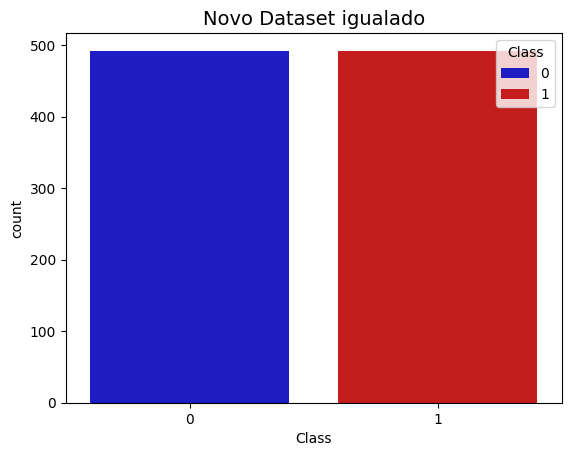

In [ ]:
print('Veja como ficou a distribuilção em nosso novo Dataset:')
print(novo_dados['Class'].value_counts()/len(novo_dados))


sns.countplot(x='Class', data=novo_dados, hue="Class", palette=colors)
plt.title('Novo Dataset igualado', fontsize=14)
plt.show()

# **Terceiro Passo:**

Agora que separamos e igualamos nosso Dataset entre as transações, podemos iniciar nossa analise e também o processamento dos dados!



---



Para iniciarmos, vamos criar um gráfico onde poderemos visualizar e comparar alguns dados do Dataset Não Balanceado e do Dataset Balanceado!

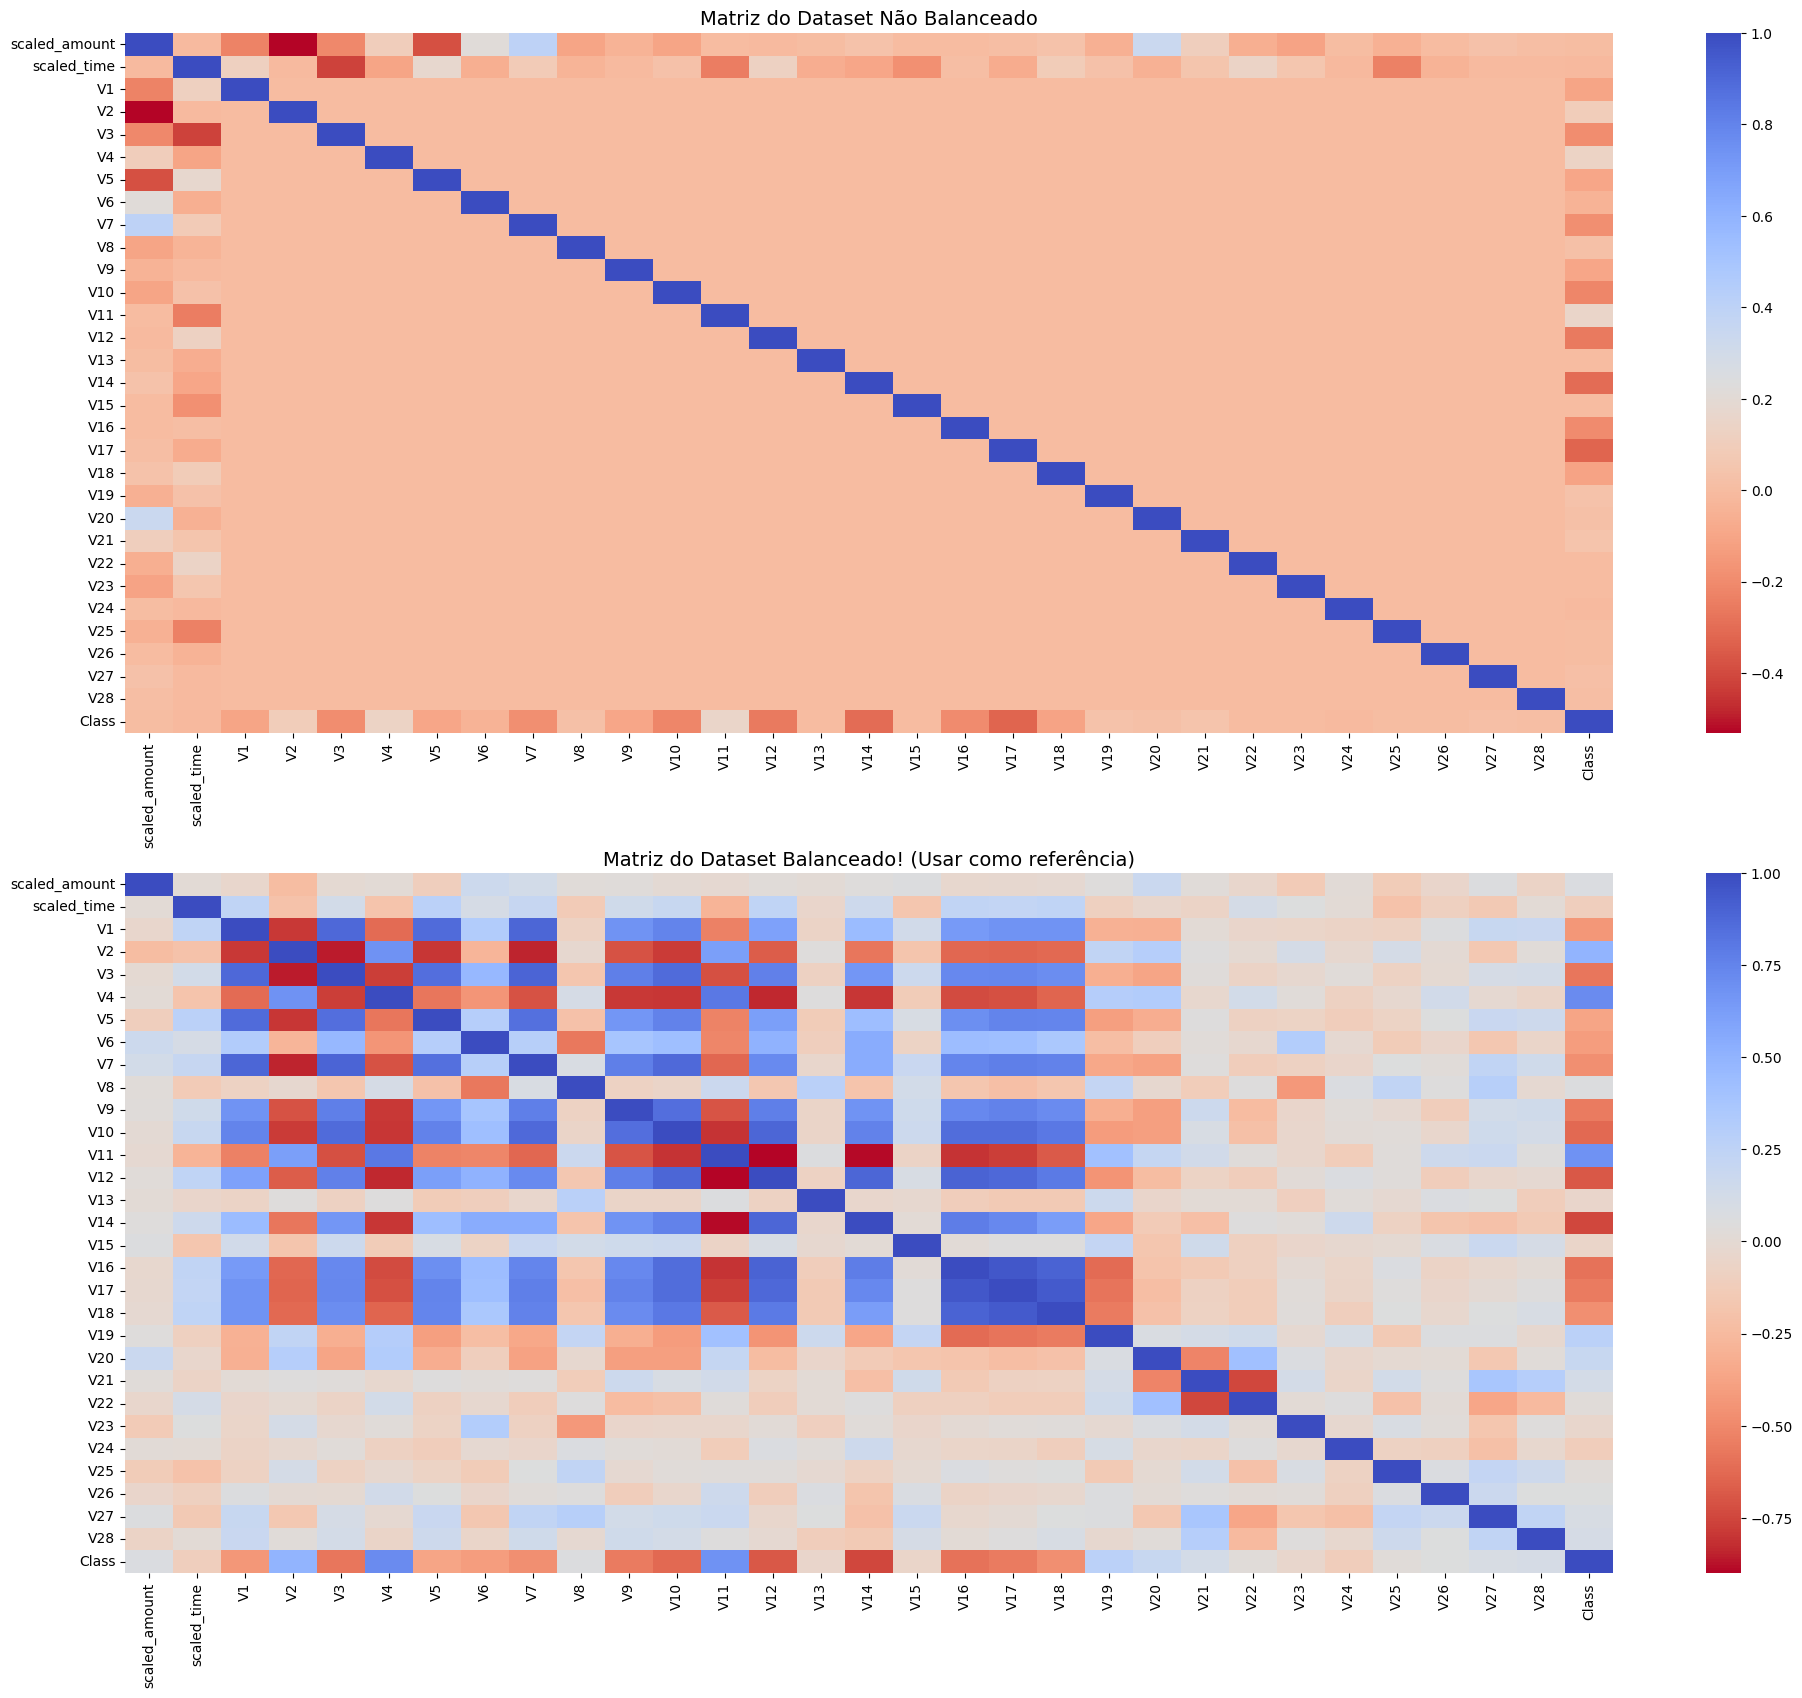

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))


#Gráfico do Dataset Não Balanceado

nbalance = dados.corr()

sns.heatmap(nbalance, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Matriz do Dataset Não Balanceado", fontsize=14)


#Gráfico do Dataset Balanceado

balance = novo_dados.corr()

sns.heatmap(balance, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title("Matriz do Dataset Balanceado! (Usar como referência)", fontsize=14)

plt.show()

Bom, agora que temos nossos gráficos, conseguimos analisar com um pouco mais de precisão e tirar algumas pequenas conclusões e relações entre os valores!

***Relações Positivas:***
  Perceba que em V2, V4, V11 e V19, existe uma relação positiva entre elas! Observe que quanto maior os valores entre elas, maior a chance de finalizar em uma transação Fraudulenta.

***Relações Negativas:***
  Veja que em V10, V12, V14 e V17 encontramos uma relação negativa! Quantos menores esses valores, mais provável que no final tenhamos uma transação NÃO fraudulenta!


Vamos analisar isso em algumas BoxPlots...

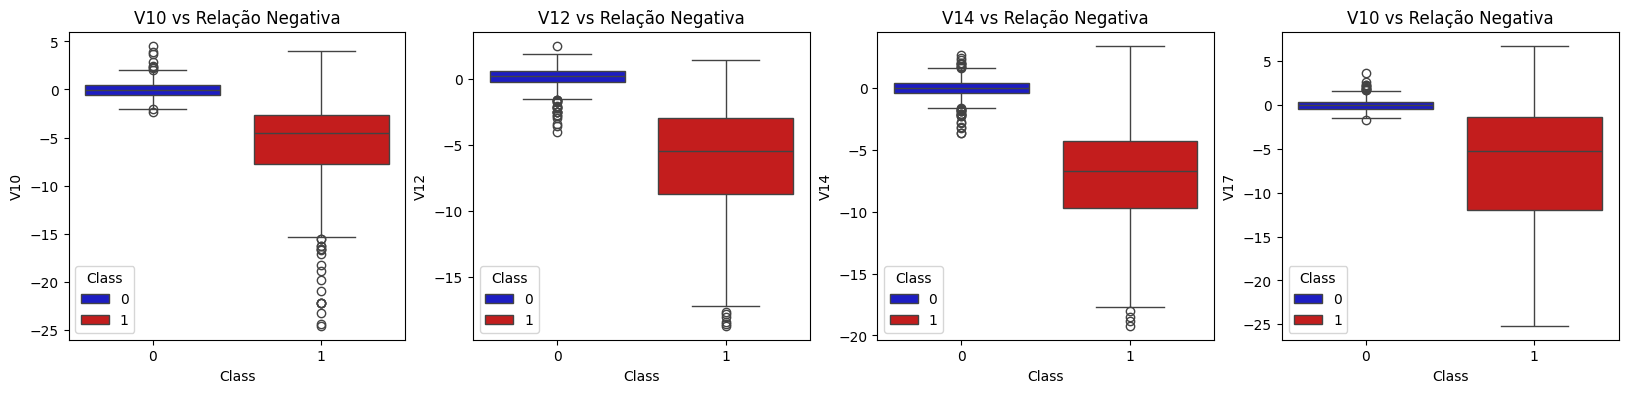

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

#Vamos mostrar primeiro as Relações Negativas

sns.boxplot(x="Class", y="V10", data=novo_dados, hue="Class", palette=colors, ax=axes[0])
axes[0].set_title('V10 vs Relação Negativa')

sns.boxplot(x="Class", y="V12", data=novo_dados, hue="Class", palette=colors, ax=axes[1])
axes[1].set_title('V12 vs Relação Negativa')

sns.boxplot(x="Class", y="V14", data=novo_dados, hue="Class", palette=colors, ax=axes[2])
axes[2].set_title('V14 vs Relação Negativa')

sns.boxplot(x="Class", y="V17", data=novo_dados, hue="Class", palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Relação Negativa')

plt.show()

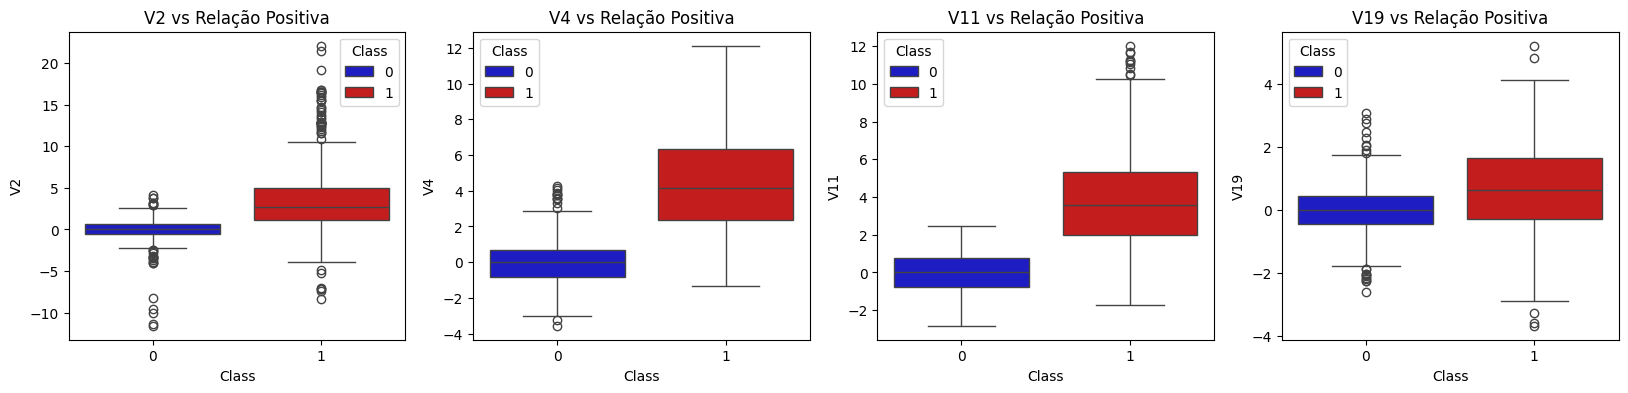

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

#Agora vamos as Relações Positivas

sns.boxplot(x="Class", y="V2", data=novo_dados, hue="Class", palette=colors, ax=axes[0])
axes[0].set_title('V2 vs Relação Positiva')

sns.boxplot(x="Class", y="V4", data=novo_dados, hue="Class", palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Relação Positiva')

sns.boxplot(x="Class", y="V11", data=novo_dados, hue="Class", palette=colors, ax=axes[2])
axes[2].set_title('V11 vs Relação Positiva')

sns.boxplot(x="Class", y="V19", data=novo_dados, hue="Class", palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Relação Positiva')

plt.show()

Agora, nosso objetivo será remover "Outliers Extremos" para podermos cada vez ter uma precisão maior dos nossos modelos!

Usaremos IQR (Intervalor Interquartil) e boxplots para determinarmos e termos conhecimentos visuais disso!

Precisaremos tomar alguns cuidados com o limite de remoção dos Outliers! O limite determinado será de 1,5, uma vez que determinamos retirar apenas "Outliers extremos", já que nosso Dataset está desbalanceado e estamos utilizando uma parcela pequena dos dados existentes!



---



Vamos iniciar criando um gráfico para demonstrar visualmente algumas distribuições de dados Fraudulentos e tomarmos a decisão de onde iremos aplicar a remoção dos Outliers Extremos.

<ipython-input-17-9df9ee878646>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v14_fraude_dist, ax=ax1, fit=norm, color='#FB8861')
<ipython-input-17-9df9ee878646>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v12_fraude_dist, ax=ax2, fit=norm, color='#56B3F9')
<ipython-input-17-9df9ee87864

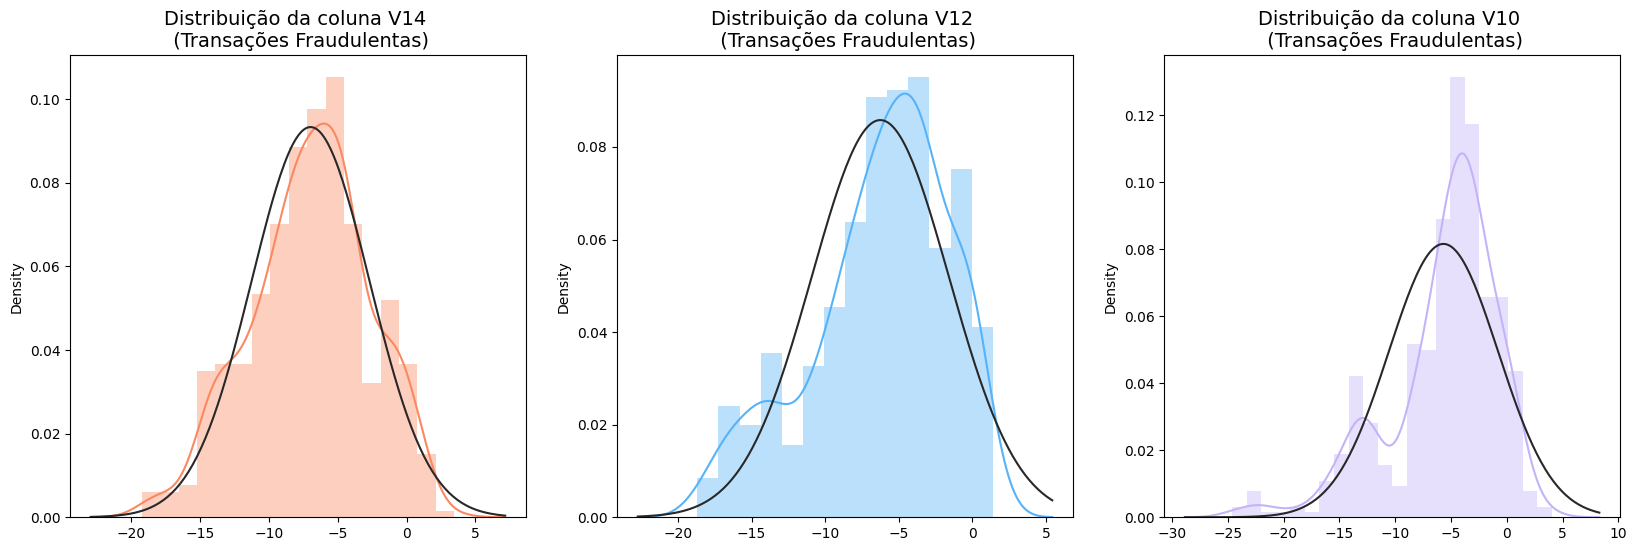

In [ ]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,6))

v14_fraude_dist = novo_dados['V14'].loc[novo_dados['Class']==1].values
sns.distplot(v14_fraude_dist, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Distribuição da coluna V14 \n (Transações Fraudulentas)', fontsize = 14)

v12_fraude_dist = novo_dados['V12'].loc[novo_dados['Class']==1].values
sns.distplot(v12_fraude_dist, ax=ax2, fit=norm, color='#56B3F9')
ax2.set_title('Distribuição da coluna V12 \n (Transações Fraudulentas)', fontsize = 14)

v10_fraude_dist = novo_dados['V10'].loc[novo_dados['Class']==1].values
sns.distplot(v10_fraude_dist, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('Distribuição da coluna V10 \n (Transações Fraudulentas)', fontsize = 14)

plt.show()

Podemos perceber que a Coluna V14 se diferencia das Colunas V12 e V10, sendo a V14 a única com uma distribuição Gaussiana em comparação as outras!

Agora que já foi definido também o valor que iremos multiplicar pelo IQR para definir os limites, podemos por fim criar uma exclusão condicional afirmando que se o "limite" for excedido em ambos os extremos, eles serão removidos!



> Lembrando que os calculos para IQR são:

    IQR = Q3 - Q1
    Limite Inferior = Q1 - ValorDefinido(1.5) x IQR
    Limite Superior = Q3 + ValorDefinido(1.5) x IQR

    1.5 é um multiplicador padrão que pode ser ajustado dependendo da necessidade ou da sensibilidade à detecção dos Outliers.

    Quanto MAIOR o valor definido, MENOS outliers são detectados.
    Quanto MENOR o valor definido, MAIS outliers são detectados.


Agora vamos começar a remoção dos Outliers das 3 colunas!



In [ ]:
#Remoção de Outliers da Coluna V14

v14_fraude = novo_dados['V14'].loc[novo_dados['Class']==1].values
q25, q75 = np.percentile(v14_fraude, 25), np.percentile(v14_fraude, 75)

print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))

v14_iqr = q75 - q25
print('IQR: {}'.format(v14_iqr))

#Definição dos cortes com os limites inferior e superior
v14_corte = v14_iqr * 1.5
v14_inferior, v14_superior = q25 - v14_corte, q75 + v14_corte
print('V14 Inferior: {}'.format(v14_inferior))
print('V14 Superior: {}'.format(v14_superior))

outliers = [x for x in v14_fraude if x < v14_inferior or x > v14_superior]
print('V14 Outliers: {}'.format(outliers))
print('Outliers da Coluna V14: {}'.format(len(outliers)))

#Removendo do Dataset os Outliers
novo_dados = novo_dados.drop(novo_dados[(novo_dados['V14'] > v14_superior) | (novo_dados['V14'] < v14_inferior)].index)
print('Quantidade de instancias depois da remoção: {}'.format(len(novo_dados)))

print('---' * 40)

#Remoção de Outliers da Coluna V12

v12_fraude = novo_dados['V12'].loc[novo_dados['Class']==1].values
q25, q75 = np.percentile(v12_fraude, 25), np.percentile(v12_fraude, 75)

print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))

v12_iqr = q75 - q25
print('IQR: {}'.format(v12_iqr))

#Definição dos cortes com os limites inferior e superior
v12_corte = v12_iqr * 1.5
v12_inferior, v12_superior = q25 - v12_corte, q75 + v12_corte
print('V12 Inferior: {}'.format(v12_inferior))
print('V12 Superior: {}'.format(v12_superior))

outliers = [x for x in v12_fraude if x < v12_inferior or x > v12_superior]
print('V12 Outliers: {}'.format(outliers))
print('Outliers da Coluna V12: {}'.format(len(outliers)))

#Removendo do Dataset os Outliers
novo_dados = novo_dados.drop(novo_dados[(novo_dados['V12'] > v12_superior) | (novo_dados['V12'] < v12_inferior)].index)
print('Quantidade de instancias depois da remoção: {}'.format(len(novo_dados)))

print('---' * 40)


#Remoção de Outliers da Coluna V10

v10_fraude = novo_dados['V10'].loc[novo_dados['Class']==1].values
q25, q75 = np.percentile(v10_fraude, 25), np.percentile(v10_fraude, 75)

print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))

v10_iqr = q75 - q25
print('IQR: {}'.format(v10_iqr))

#Definição dos cortes com os limites inferior e superior
v10_corte = v10_iqr * 1.5
v10_inferior, v10_superior = q25 - v10_corte, q75 + v10_corte
print('V10 Inferior: {}'.format(v10_inferior))
print('V10 Superior: {}'.format(v10_superior))

outliers = [x for x in v10_fraude if x < v10_inferior or x > v10_superior]
print('V10 Outliers: {}'.format(outliers))
print('Outliers da Coluna V10: {}'.format(len(outliers)))

#Removendo do Dataset os Outliers
novo_dados = novo_dados.drop(novo_dados[(novo_dados['V10'] > v10_superior) | (novo_dados['V10'] < v10_inferior)].index)
print('Quantidade de instancias depois da remoção: {}'.format(len(novo_dados)))


Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
IQR: 5.409902115485521
V14 Inferior: -17.807576138200666
V14 Superior: 3.8320323237414167
V14 Outliers: [-18.8220867423816, -19.2143254902614, -18.0499976898594, -18.4937733551053]
Outliers da Coluna V14: 4
Quantidade de instancias depois da remoção: 980
------------------------------------------------------------------------------------------------------------------------
Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
IQR: 5.780002635714835
V12 Inferior: -17.3430371579634
V12 Superior: 5.776973384895937
V12 Outliers: [-18.0475965708216, -18.4311310279993, -18.5536970096458, -18.6837146333443]
Outliers da Coluna V12: 4
Quantidade de instancias depois da remoção: 976
------------------------------------------------------------------------------------------------------------------------
Quartile 25: -7.466658535821847 | Quartile 75: -2.5118611381562523
IQR: 4.954797397665595
V10 Inferior: -14.898854632320

**Vamos criar alguns BoxPlots agora para visualizarmos os Outliers Removidos**

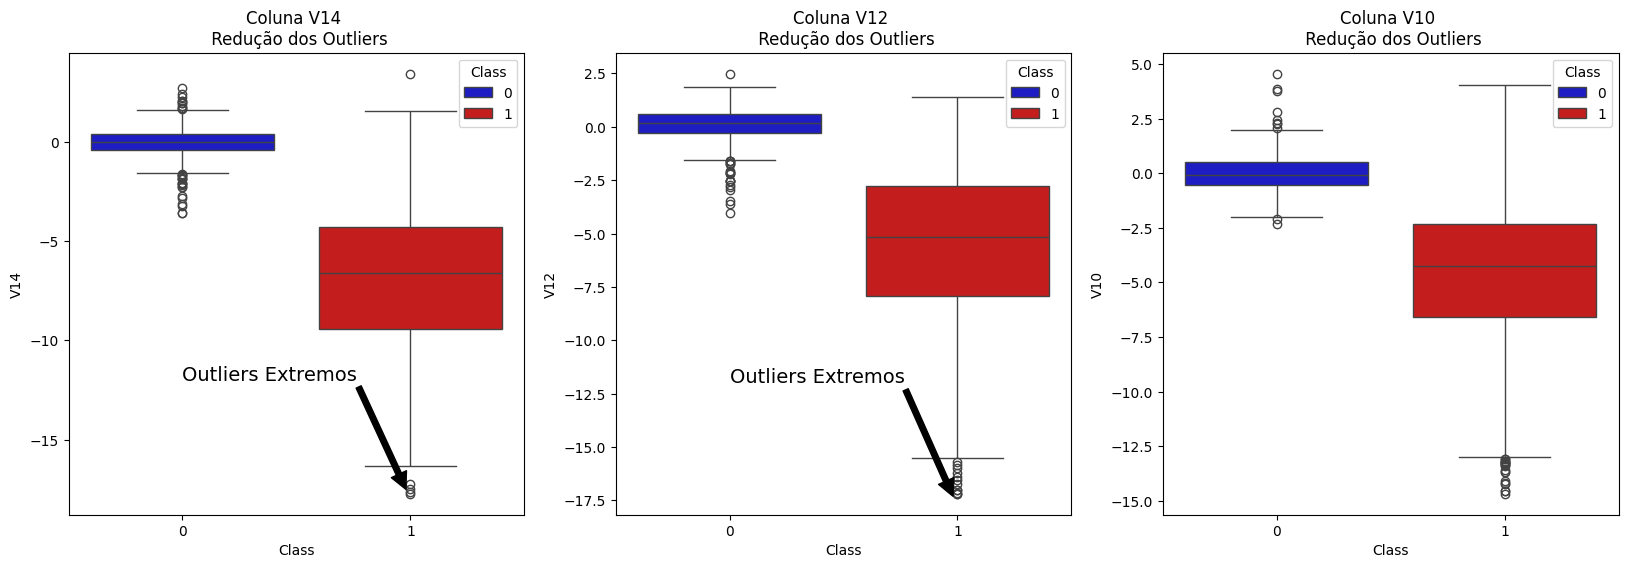

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

#Boxplot da Coluna V14

sns.boxplot(x='Class', y='V14', data=novo_dados, ax=ax1, hue='Class', palette = colors)
ax1.set_title('Coluna V14 \n Redução dos Outliers')
ax1.annotate('Outliers Extremos', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

#Boxplot da Coluna V12

sns.boxplot(x='Class', y='V12', data=novo_dados, ax=ax2, hue='Class', palette = colors)
ax2.set_title('Coluna V12 \n Redução dos Outliers')
ax2.annotate('Outliers Extremos', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

#Boxplot da Coluna V10

sns.boxplot(x='Class', y='V10', data=novo_dados, ax=ax3, hue='Class', palette = colors)
ax3.set_title('Coluna V10 \n Redução dos Outliers')
ax3.annotate('Outliers Extremos', xy=(0.98, -16.5), xytext=(0, -6),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

plt.show()

Agora vamos aplicar três técnicas de Redução de Dimensionalidade (t-SNE, PCA e TruncatedSVD) para transformar os dados em duas dimensões, visando facilitar a visualização!

Vamos também usar a biblioteca ***time*** para medirmos o tempo de execução das tarefas!

In [ ]:
x = novo_dados.drop('Class', axis=1)
y = novo_dados['Class']

# Aplicação do t-SNE

t0 = time.time()
x_reducao_tsne = TSNE(n_components=2, random_state=0).fit_transform(x.values)
t1 = time.time()
print('Tempo de execução do t-SNE: {} segundos'.format(t1 - t0))

# Aplicação do PCA
t0 = time.time()
x_reducao_pca = PCA(n_components=2, random_state=0).fit_transform(x.values)
t1 = time.time()
print('Tempo de execução do PCA: {} segundos'.format(t1 - t0))

# Aplicação do TruncatedSVD
t0 = time.time()
x_reducao_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(x.values)
t1 = time.time()
print('Tempo de execução do TruncatedSVD: {} segundos'.format(t1 - t0))

Tempo de execução do t-SNE: 9.921931982040405 segundos
Tempo de execução do PCA: 0.007561445236206055 segundos
Tempo de execução do TruncatedSVD: 0.004830360412597656 segundos


Ainda não finalizado...